# Theory --  Different classifiers and their loss function and gradient

## Loss function and Gradient
In neural network, there are lots of linear relationships between the neurons (variables within the neural network). 

Take the simpliest case, where the input $X$ is of dimension $N\times D$, with $D$ features and $N$ instances. There are $C$ classes to be identified. ($x_i$, $y_i$) is one instance, where $x_i$ is a row of $X$ and $y_i$ is a number to represent one class. $y_i \in \{0 \dots C-1 \}$ The weight parameter of the linear relationship is $W$, of dimension $D \times C$. There is also another parameter called bias, $b$, which just give some shift and has dimension of $C$.

To simplify the notations, we define,
$f(x_i;W,b)=W^T x_i+b$
In which,
$w_j$ is the $j$th column of $W$, $b_j$ is the $j$th item of $b$.

We also define,
$f_j^i=f(x_i;W,b)_j=w_j^T x_i+b_j$


## Loss function
The total loss functions is defined to be a combination of data loss and regularization term on parameters.
$$
L=\frac{1}{N}\sum_i^{N} L_i+\frac{1}{2}\lambda||W||^2
$$

Here the regularization on weight is defined as L2 norm.

## Gradient

$$
\frac{\partial L}{\partial w_j}=\frac{1}{N}\sum_i^{N}\frac{\partial L_i}{\partial w_j}+\lambda w_j \\\
\frac{\partial L}{\partial b_j}=\frac{1}{N}\sum_i^{N}\frac{\partial L_i}{\partial b_j}
$$

Both the loss function and the form of gradient calculation are in general form. Different regression methods defined different form of $L_i$.


## Binary classes
For binary classes, we just need to predict one of the two classes. If one class is less likely, then the other class should be the most possible one. 

In binary classes case, the weights collapse from matrix $W$ to a vector $w$ of size $C$. The bias also collapse from a vector to a scalar, but still denoted as $b$ for reason of being lazy. 

### Logistic regression
In logistic regression, define the probability of $y$ as $p(y)=\sigma(y)$,
where $\sigma(y)$ is the "sigmoid" or "logistic" function,
$\sigma(y)=\frac{1}{1+e^{-y}}$. $y_i \in \{0,1\}$. To predict $y$ with $x_i$, simply check wether $p(f(x_i;w,b))$ is closer to 1 or 0. (Or just check the sign of $f(x_i;w,b)$). Logistic regression nicely give the probability of the prediction in addition to the prediction itself. 

**Loss**
$$
L_i=-(y_i \log(p(f(x_i;w,b)))+(1-y_i)\log(1-p(f(x_i;w,b))))
$$

**Gradient**
$$
\frac{\partial L}{\partial w}=x_i(p(f(x_i;w,b)-y_i) \\\
\frac{\partial L}{\partial b}=(p(f(x_i;w,b)-y_i)
$$


### Binary SVM
In binary SVM, for convenience purpose, set $y_i \in \{-1,1\}$, To predict $y$ with $x_i$, simply check wether $f(x_i;w,b)$ is positive (indicate $y_i = 1$) or negative (indicate $y_i = -1$). 

**Loss**
$$
L_i=C\max(0,1 -  y_i f(x_i;w,b) )
$$

$C$ is a hyper-paramter. However, because we have included the regularization, which has the same effect, $C$ can be set to one. 

**Gradient**
$$
\frac{\partial L}{\partial w} =
\begin{cases}
- x_i y_i,  & \text{if $1 -  y_i f(x_i;w,b)>0$} \\\
0, & \text{else}
\end{cases}
$$

$$
\frac{\partial L}{\partial b} =
\begin{cases}
- y_i,  & \text{if $1 -  y_i f(x_i;w,b)>0$} \\\
0, & \text{else}
\end{cases}
$$



## Multiple classes

### Softmax regression
Softmax regression is a general form of logistic regression for multiclass case. In softmax regression, define probability $p(y=k|x_i)=\frac{e^{f_{k}^i}}{\sum_j e^{f_j^i}}$. To predict, just check which $k$ gives the largest probability $p(y=k|x_i)$.

**Loss**
$$
L_i=-\log(p(y_i|x_i))
$$

**Gradient**
$$
\frac{\partial L_i}{\partial w_j}=x_i(p(y_i|x_i)-1(y_i=j)) \\\
\frac{\partial L_i}{\partial b_j}=(p(y_i|x_i)-1(y_i=j))
$$


### Multiclass SVM
Multiclass SVM regression is a general form of binary SVM regression for multiclass case. To predict, just check which $k$ gives the largest value of $f(x_i;W,b)_k$.

**Loss**
$$
L_i=\sum_{j \neq y_i} \max(0,f_j^i -f_{y_i}^i + \Delta )
$$

$\Delta$ is the margin, a hyper-paramter. However, because we have included the regularization, which has the same effect, $\Delta$ can be set to one. 

**Gradient**
for $j=y_i$
$$
\frac{\partial L_i}{\partial w_{y_i}}=-(\sum_{j\neq y_i} 1(f_j^i - f_{y_i}^i+\Delta>0))x_i \\\
\frac{\partial L_i}{\partial b_{y_i}}=-(\sum_{j\neq y_i} 1(f_j^i - f_{y_i}^i+\Delta>0))
$$

for $j\neq y_i$
$$
\frac{\partial L_i}{\partial w_j}=1(f_j^i - f_{y_i}^i+\Delta>0)x_i \\\
\frac{\partial L_i}{\partial b_j}=1(f_j^i - f_{y_i}^i+\Delta>0)
$$






In [1]:
import matplotlib.pyplot as plt 
import numpy as np 

%matplotlib inline
plt.rcParams['image.aspect']='auto' 

# Synthetic data with binary classes

## Logistic regression
y labels are either 0 or 1.

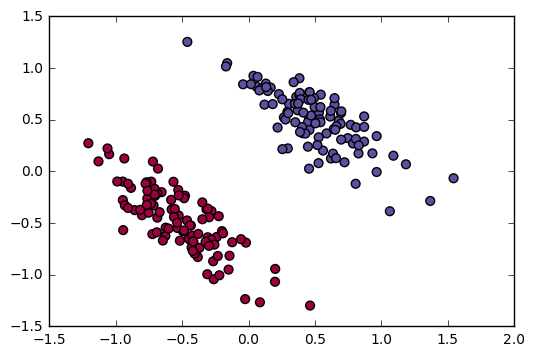

In [2]:
N = 100 # number of points per class
Nx = 2 # dimensionality
K = 2 # number of classes
X = np.zeros((N*K,Nx)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype=int) # class labels

Nd=N*K

mean1=[-0.5,-0.5]
mean2=[0.5,0.5]
cov1=[[1,-0.8],[-0.8,1]]
cov1=np.array(cov1)*0.1
cov2=[[1,-0.8],[-0.8,1]]
cov2=np.array(cov2)*0.1

X[0:N,:]=np.random.multivariate_normal(mean1,cov1,(N))
X[N:2*N,:]=np.random.multivariate_normal(mean2,cov2,(N))
y[0:N]=-1
y[N:2*N]=1


# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()


loop 0 with loss 0.47538710927588873
loop 50 with loss 0.026272178981119932
loop 100 with loss 0.02397899218349987
loop 150 with loss 0.024007770029165293
loop 200 with loss 0.024186841029163048
loop 250 with loss 0.02430273697405639
loop 300 with loss 0.024357118751809063
loop 350 with loss 0.02438248645269759
loop 400 with loss 0.024406803032783635
loop 450 with loss 0.024429129566475596
Training is Done!
Accuracy: 1.0


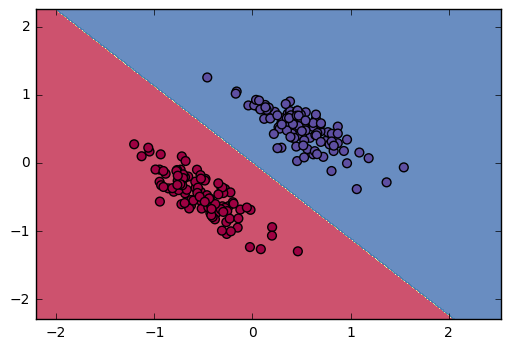

In [3]:
## Loss function
def cost(X,y):
    cost_sum =0
    for i in range(len(X)):
        # prob=sigmoid(np.dot(X[i,:],w_pred)+b_pred)
        L_i=np.maximum(0,1-y[i]*(np.dot(X[i,:],w_pred)+b_pred))
        cost_sum += L_i
    cost_sum = 0.5*cost_sum/len(X)
    cost_sum += 0.5*reg*np.sum(w_pred*w_pred)
    return cost_sum

w_pred=np.zeros(Nx)
b_pred=0

nloop=500
step=1e-1
reg=1e-2

## Parameters update
for l in range(nloop):

    delta_w=np.zeros(Nx)
    delta_b=0
    for i in range(Nd):
        # for j in range(Nx):
        if 1-y[i]*(np.dot(X[i,:],w_pred)+b_pred)>0:
            delta_w += -y[i]*X[i,:]
            delta_b += -y[i]
        else:
            delta_w +=0
            delta_b +=0

    w_pred += -step*((1/Nd)*delta_w+reg*w_pred)
    b_pred += -step*(1/Nd)*delta_b

    if l%50 ==0:
        loss=cost(X,y)
        print('loop {} with loss {}'.format(l,loss))

print('Training is Done!')

# plt.scatter(X[:, 0], X[:, 1], c=oneOrzero(sigmoid(np.dot(X,w_pred)+b_pred)), s=40, cmap=plt.cm.Spectral)
# plt.show()

y_pred=np.sign(np.dot(X,w_pred)+b_pred)
print('Accuracy: {}'.format(np.mean(y_pred==y)))


h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.sign(np.dot(np.c_[xx.ravel(),yy.ravel()],w_pred)+b_pred)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
# plt.scatter(X[:, 0], X[:, 1], c=oneOrzero(sigmoid(np.dot(X,w_pred)+b_pred)), s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

## Binary SVM classifier
y labels are either -1 or 1.

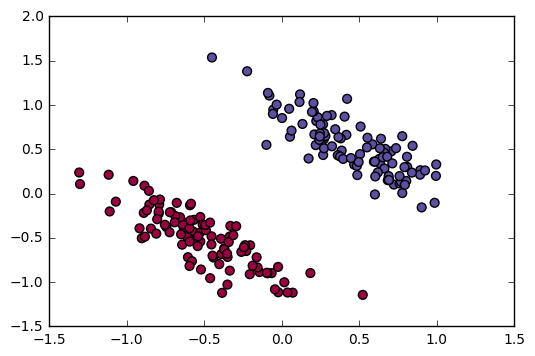

In [4]:
N = 100 # number of points per class
Nx = 2 # dimensionality
K = 2 # number of classes
X = np.zeros((N*K,Nx)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels

Nd=N*K

mean1=[-0.5,-0.5]
mean2=[0.5,0.5]
cov1=[[1,-0.8],[-0.8,1]]
cov1=np.array(cov1)*0.1
cov2=[[1,-0.8],[-0.8,1]]
cov2=np.array(cov2)*0.1

X[0:N,:]=np.random.multivariate_normal(mean1,cov1,(N))
X[N:2*N,:]=np.random.multivariate_normal(mean2,cov2,(N))
y[0:N]=0
y[N:2*N]=1



# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

loop 0 with loss 0.34033966778509056
loop 50 with loss 0.17614045567083073
loop 100 with loss 0.1295845990652766
loop 150 with loss 0.11317636576642125
loop 200 with loss 0.1069108541093293
loop 250 with loss 0.10469454555973509
loop 300 with loss 0.10424276382461745
loop 350 with loss 0.1045780930845328
loop 400 with loss 0.10524683684433453
loop 450 with loss 0.10602872932708693
Training is Done!
Accuracy: 1.0


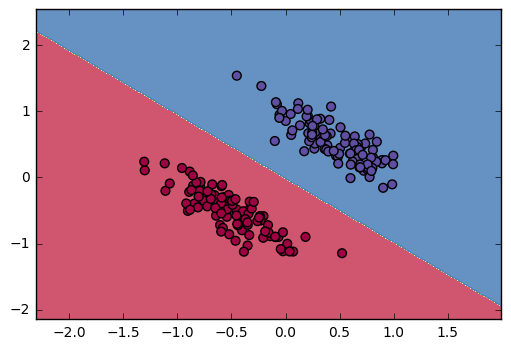

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def oneOrzero(x):
    return np.round(x)

def cost(X,y):
    cost_sum =0
    for i in range(len(X)):
        prob=sigmoid(np.dot(X[i,:],w_pred)+b_pred)
        cost_sum += -1*(y[i]*np.log(prob)+(1-y[i])*np.log(1-prob))
    cost_sum = 0.5*cost_sum/len(X)
    cost_sum += 0.5*reg*np.sum(w_pred*w_pred)
    return cost_sum

w_pred=np.zeros(Nx)
b_pred=0

nloop=500
step=1e-1
reg=1e-2

for l in range(nloop):

    delta_w=np.zeros(Nx)
    delta_b=0
    for i in range(Nd):
        # for j in range(Nx):
        delta_w += (y[i]-sigmoid(np.dot(X[i,:],w_pred)+b_pred))*(-X[i,:])
        delta_b += (y[i]-sigmoid(np.dot(X[i,:],w_pred)+b_pred))*(-1)
    w_pred += -step*((1/Nd)*delta_w+reg*w_pred)
    b_pred += -step*(1/Nd)*delta_b

    if l%50 ==0:
        loss=cost(X,y)
        print('loop {} with loss {}'.format(l,loss))

print('Training is Done!')


y_pred=oneOrzero(sigmoid(np.dot(X,w_pred)+b_pred))
print('Accuracy: {}'.format(np.mean(y_pred==y)))



h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = oneOrzero(sigmoid(np.dot(np.c_[xx.ravel(),yy.ravel()],w_pred)+b_pred))
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
# plt.scatter(X[:, 0], X[:, 1], c=oneOrzero(sigmoid(np.dot(X,w_pred)+b_pred)), s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

# Synthetic data with multiple classes
Both softmax classifier and multi-class SVM will use the same dataset. The y labels are one of (0,1,2).

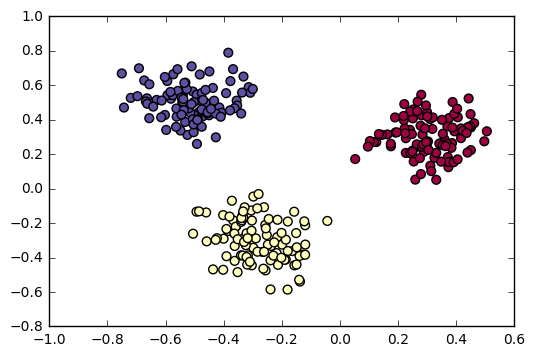

In [27]:
N = 100 # number of points per class
Nx = 2 # dimensionality
K = 3 # number of classes
Ny=K
X = np.zeros((N*K,Nx)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels

Nd=N*K

# for j in range(K):
#   ix = range(N*j,N*(j+1))
#   r = np.linspace(0.0,1,N) # radius
#   t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
#   X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
#   y[ix] = j


X[0:N,:]=np.random.randn(N,2)*0.1+0.3
X[N:2*N,:]=np.random.randn(N,2)*0.1-0.3
X[2*N:3*N,0]=np.random.randn(N)*0.1-0.5
X[2*N:3*N,1]=np.random.randn(N)*0.1+0.5
y[0:N]=0
y[N:2*N]=1
y[2*N:3*N]=2

# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

## Softmax classifier

loop 0 with loss 0.5114206012080625
loop 50 with loss 0.10580626058059128
loop 100 with loss 0.07985995714294376
loop 150 with loss 0.07452998339559544
loop 200 with loss 0.07346330197293674
loop 250 with loss 0.07362322510645952
loop 300 with loss 0.0741474966875649
loop 350 with loss 0.07474313640926657
loop 400 with loss 0.07530517015425128
loop 450 with loss 0.07579907675784024
Training is Done!
Accuracy: 1.0


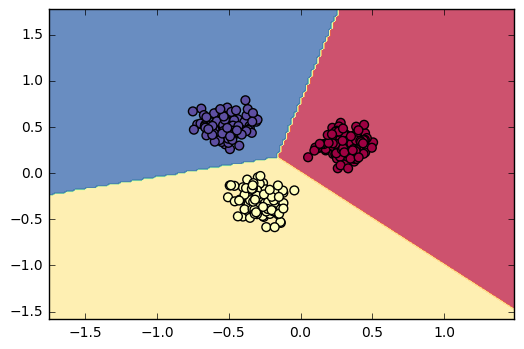

In [28]:
def onehot(y,nclass):
    yonehot=np.zeros((len(y),nclass))
    for i in range(len(y)):
        yonehot[i,y[i]]=1
    return yonehot

def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

## Loss function
def cost(X,y):
    cost_sum =0
    for i in range(len(X)):
        prob=softmax(np.dot(W_pred.T,X[i,:])+b_pred)
        cost_sum += -1*np.dot(y[i,:],np.log(prob))
    cost_sum = 0.5*cost_sum/len(X)
    cost_sum += 0.5*reg*np.sum(W_pred*W_pred)
    return cost_sum

yonehot=onehot(y,3)

W_pred=np.zeros((Nx,Ny))
b_pred=np.zeros(Ny)



nloop=500
step=1e0
reg=1e-3

## parameter update
for l in range(nloop):

    delta_W=np.zeros((Nx,Ny))
    delta_b=np.zeros(Ny)
    for m in range(Nd): # m
        prob=softmax(np.dot(W_pred.T,X[m,:])+b_pred)

        for j in range(Ny):
            delta_W[:,j] += (yonehot[m,j]-prob[j])*(-X[m,:])
            delta_b[j] +=  (yonehot[m,j]-prob[j])*(-1)
    W_pred += -step*((1/Nd)*delta_W+reg*W_pred)
    b_pred += -step*(1/Nd)*delta_b

    if l%50 ==0:
        loss=cost(X,yonehot)
        print('loop {} with loss {}'.format(l,loss))

print('Training is Done!')

# print(W_pred.T)

y_pred=np.argmax(softmax(np.dot(X,W_pred)+b_pred),axis=1)

print('Accuracy: {}'.format(np.mean(y_pred==y)))


h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z=np.zeros(len(xx)*len(xx[0]))

for i in range(len(xx)*len(xx[0])):
    # print(softmax(np.dot(W_pred.T,np.c_[xx.ravel(),yy.ravel()][i,:])+b_pred))
    Z[i]=np.argmax(softmax(np.dot(W_pred.T,np.c_[xx.ravel(),yy.ravel()][i,:])+b_pred))

Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
# plt.scatter(X[:, 0], X[:, 1], c=oneOrzero(sigmoid(np.dot(X,w_pred)+b_pred)), s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

## Multi-class SVM classifier

loop 0 with loss 0.6412306457555146
loop 50 with loss 0.0052000514863300455
loop 100 with loss 0.003414330312198651
loop 150 with loss 0.002550760459891696
loop 200 with loss 0.002216601741154215
loop 250 with loss 0.0020734870536565815
loop 300 with loss 0.0019856799086033733
loop 350 with loss 0.0019032359448786311
loop 400 with loss 0.0018272656559138046
loop 450 with loss 0.0017805615821543162
Training is Done!
Accuracy: 1.0


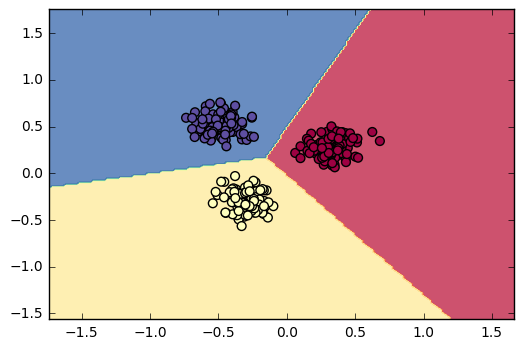

In [8]:
def cost(X,y):
    cost_sum =0
    for i in range(len(X)):
      delta = 1.0
      scores = np.dot(X[i,:],W_pred)+b_pred
      # compute the margins for all classes in one vector operation
      margins = np.maximum(0, scores - scores[y[i]] + delta)
      margins[y[i]] = 0
      cost_sum += np.sum(margins)
    cost_sum = 0.5*cost_sum/len(X)
    cost_sum += 0.5*reg*np.sum(W_pred*W_pred)
    return cost_sum

W_pred=np.zeros((Nx,Ny))
b_pred=np.zeros(Ny)



nloop=500
step=1e0
reg=1e-4


for l in range(nloop):

    delta_W=np.zeros((Nx,Ny))
    delta_b=np.zeros(Ny)
    for i in range(Nd): # m
        scores = X[i].dot(W_pred)+b_pred
        correct_class_score = scores[y[i]]

        for j in range(Ny):
            if j == y[i]:
                continue
            margin = scores[j] - correct_class_score + 1
            if margin > 0:
                delta_W[:,y[i]] -= X[i,:]
                delta_b[y[i]] -= 1
                delta_W[:,j] += X[i,:]
                delta_b[j] += 1
    W_pred += -step*((1/Nd)*delta_W+reg*W_pred)
    b_pred += -step*(1/Nd)*delta_b

    if l%50 ==0:
        loss=cost(X,y)
        print('loop {} with loss {}'.format(l,loss))

print('Training is Done!')


y_pred=np.argmax(np.dot(X,W_pred)+b_pred,axis=1)
print('Accuracy: {}'.format(np.mean(y_pred==y)))


h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


Z=np.zeros(len(xx)*len(xx[0]))

for i in range(len(xx)*len(xx[0])):
    # print(softmax(np.dot(W_pred.T,np.c_[xx.ravel(),yy.ravel()][i,:])+b_pred))
    Z[i]=np.argmax(np.dot(W_pred.T,np.c_[xx.ravel(),yy.ravel()][i,:])+b_pred)

Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
# plt.scatter(X[:, 0], X[:, 1], c=oneOrzero(sigmoid(np.dot(X,w_pred)+b_pred)), s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

### Classes that can not be linearly separable

OK, in the previous cases, the different classes are linearly separable. And we have seen that Logistic regression, binary SVM, softmax, multi-class SVM all work successfully in seperating different classes. 

Now let's make the different class clusters with more complicated shape. We will see that the previous classifiers are not able to correctly separate different classes.

### Display synthetic dataset

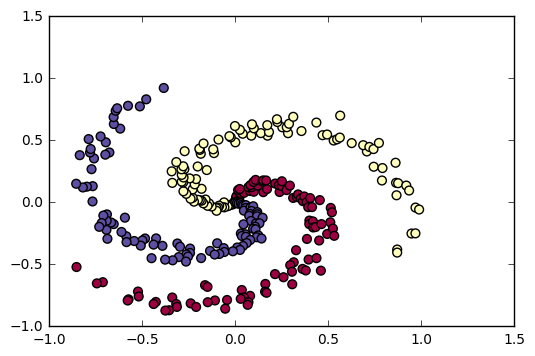

In [9]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
Ny=K
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels

Nd=N*K

for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j


# X[0:N,:]=np.random.randn(N,2)*0.1+0.3
# X[N:2*N,:]=np.random.randn(N,2)*0.1-0.3
# X[2*N:3*N,0]=np.random.randn(N)*0.1-0.5
# X[2*N:3*N,1]=np.random.randn(N)*0.1+0.5
# y[0:N]=0
# y[N:2*N]=1
# y[2*N:3*N]=2

# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

### Softmax classifier

loop 0 with loss 0.534220810809118
loop 50 with loss 0.391897947779818
loop 100 with loss 0.38675049561663083
loop 150 with loss 0.3864700670392861
loop 200 with loss 0.38659096145792
loop 250 with loss 0.38668965079751777
loop 300 with loss 0.38674398064348686
loop 350 with loss 0.3867711101794545
loop 400 with loss 0.3867841869490845
loop 450 with loss 0.3867903996883595
Training is Done!
Accuracy: 0.52


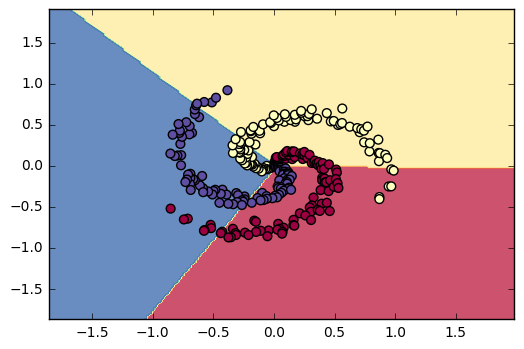

In [10]:
def cost(X,y):
    cost_sum =0
    for i in range(len(X)):
        prob=softmax(np.dot(W_pred.T,X[i,:])+b_pred)
        cost_sum += -1*np.dot(y[i,:],np.log(prob))
    cost_sum = 0.5*cost_sum/len(X)
    cost_sum += 0.5*reg*np.sum(W_pred*W_pred)
    return cost_sum

yonehot=onehot(y,3)

W_pred=np.zeros((D,Ny))
b_pred=np.zeros(Ny)



nloop=500
step=1e0
reg=1e-3


for l in range(nloop):

    delta_W=np.zeros((D,Ny))
    delta_b=np.zeros(Ny)
    for m in range(Nd): # m
        prob=softmax(np.dot(W_pred.T,X[m,:])+b_pred)

        for j in range(Ny):
            delta_W[:,j] += (yonehot[m,j]-prob[j])*(-X[m,:])
            delta_b[j] +=  (yonehot[m,j]-prob[j])*(-1)
    W_pred += -step*((1/Nd)*delta_W+reg*W_pred)
    b_pred += -step*(1/Nd)*delta_b

    if l%50 ==0:
        loss=cost(X,yonehot)
        print('loop {} with loss {}'.format(l,loss))

print('Training is Done!')

# print(W_pred.T)

y_pred=np.argmax(softmax(np.dot(X,W_pred)+b_pred),axis=1)

print('Accuracy: {}'.format(np.mean(y_pred==y)))


h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z=np.zeros(len(xx)*len(xx[0]))

for i in range(len(xx)*len(xx[0])):
    # print(softmax(np.dot(W_pred.T,np.c_[xx.ravel(),yy.ravel()][i,:])+b_pred))
    Z[i]=np.argmax(softmax(np.dot(W_pred.T,np.c_[xx.ravel(),yy.ravel()][i,:])+b_pred))

Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
# plt.scatter(X[:, 0], X[:, 1], c=oneOrzero(sigmoid(np.dot(X,w_pred)+b_pred)), s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

### Multi-class SVM

loop 0 with loss 0.8601612360252794
loop 50 with loss 0.5374446664063645
loop 100 with loss 0.5371132766827059
loop 150 with loss 0.5370992685726151
loop 200 with loss 0.537101018499897
loop 250 with loss 0.5370968608653709
loop 300 with loss 0.5371002274908537
loop 350 with loss 0.5371019053386494
loop 400 with loss 0.5371034509262731
loop 450 with loss 0.5371039175703135
Training is Done!
Accuracy: 0.5166666666666667


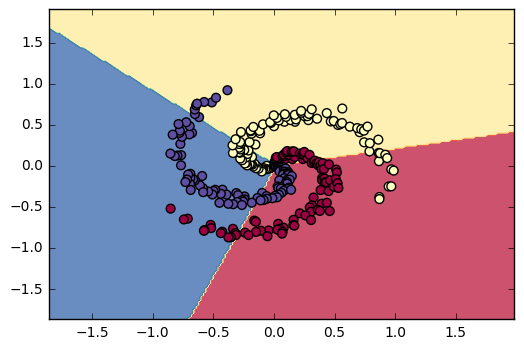

In [11]:
def cost(X,y):
    cost_sum =0
    for i in range(len(X)):
      delta = 1.0
      scores = np.dot(X[i,:],W_pred)+b_pred
      # compute the margins for all classes in one vector operation
      margins = np.maximum(0, scores - scores[y[i]] + delta)
      margins[y[i]] = 0
      cost_sum += np.sum(margins)
    cost_sum = 0.5*cost_sum/len(X)
    cost_sum += 0.5*reg*np.sum(W_pred*W_pred)
    return cost_sum

W_pred=np.zeros((D,Ny))
b_pred=np.zeros(Ny)



nloop=500
step=1e0
reg=1e-4


for l in range(nloop):

    delta_W=np.zeros((D,Ny))
    delta_b=np.zeros(Ny)
    for i in range(Nd): # m
        scores = X[i].dot(W_pred)+b_pred
        correct_class_score = scores[y[i]]

        for j in range(Ny):
            if j == y[i]:
                continue
            margin = scores[j] - correct_class_score + 1
            if margin > 0:
                delta_W[:,y[i]] -= X[i,:]
                delta_b[y[i]] -= 1
                delta_W[:,j] += X[i,:]
                delta_b[j] += 1
    W_pred += -step*((1/Nd)*delta_W+reg*W_pred)
    b_pred += -step*(1/Nd)*delta_b

    if l%50 ==0:
        loss=cost(X,y)
        print('loop {} with loss {}'.format(l,loss))

print('Training is Done!')


y_pred=np.argmax(np.dot(X,W_pred)+b_pred,axis=1)
print('Accuracy: {}'.format(np.mean(y_pred==y)))


h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


Z=np.zeros(len(xx)*len(xx[0]))

for i in range(len(xx)*len(xx[0])):
    # print(softmax(np.dot(W_pred.T,np.c_[xx.ravel(),yy.ravel()][i,:])+b_pred))
    Z[i]=np.argmax(np.dot(W_pred.T,np.c_[xx.ravel(),yy.ravel()][i,:])+b_pred)

Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
# plt.scatter(X[:, 0], X[:, 1], c=oneOrzero(sigmoid(np.dot(X,w_pred)+b_pred)), s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

# Neural Network
OK, it is clear that neither softmax nor SVM does not work for the previous cases. Let's try build a simple Neural Network with one hidden layer. We will see that this simple Neural Net is working great for the complex dataset.

## 1 layer NN

**Structure**

The structure of a simply Neural net is:

X(input) -> fully connect (matrix product with weight and add bias) -> activation function -> softmax classifier

**Activation function**

There are several different activation functions that we can use. In the following tests, we apply sigmoid, tanh, ReLu functions separately. It seems that different activation function will require different hyper-parameters, e.g. learning rate, iteration numbers, to achieve satisfying result. And ReLu activation seems to be the easist and fastest one for convergence. 

**Parameter update**

I used mini-batch stochastic gradient descent method.

In [12]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def deriv_sig(x):
  return sigmoid(x)*(1-sigmoid(x))

def relu(x):
  return np.maximum(0,x)

def deriv_relu(x):
  return 1.*(x>0)

def tanh(x):
  return np.tanh(x)

def deriv_tanh(x):
  return 1. - np.power(tanh(x),2) 

class OneLayerNN():

  def __init__(self, input_dim=2, hidden_dim=100,num_classes=10,activation='relu',reg=0.0):
    h1=input_dim
    h2 = hidden_dim # size of hidden layer

    N1=np.sqrt(h1)
    self.W1 = np.random.randn(h1,h2)/N1
    self.b1 = np.zeros((1,h2))

    N2=np.sqrt(h2)
    self.W2 = np.random.randn(h2,num_classes)/N2
    self.b2 = np.zeros((1,num_classes))

    self.reg=reg
    self.activation=activation

  def predict(self,X):
    # evaluate training set accuracy
    a1=X
    z2=np.dot(a1, self.W1) + self.b1
    if self.activation=='sigmoid':
      a2=sigmoid(z2)
    elif self.activation=='tanh':
      a2=tanh(z2)
    else: ## by default, use ReLU activation
      a2=relu(z2)

    scores = np.dot(a2,self.W2) +self.b2
    predicted_class = np.argmax(scores, axis=1)
    # print('training accuracy: %.2f' % (np.mean(predicted_class == y)))
    return predicted_class

  def train(self,X,y,Niter=1000,learning_rate=1e-1,Nprint=100,
    batch_size=100,lr_decay=1.0):
    num_train = X.shape[0]

    if batch_size==0:
      batch_size=num_train

    for i in range(Niter):

      batch_mask = np.random.choice(num_train, batch_size)
      X_batch = X[batch_mask]
      y_batch = y[batch_mask]
    
      ## Forward propagation
      a1=X_batch

      # evaluate class scores, [N x K]
      z2=np.dot(a1, self.W1) + self.b1
      if self.activation=='sigmoid':
        a2=sigmoid(z2)
      elif self.activation=='tanh':
        a2=tanh(z2)
      else: ## by default, use ReLU activation
        a2=relu(z2)

      z3=np.dot(a2,self.W2) +self.b2

      # compute the class probabilities
      exp_scores = np.exp(z3)
      probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
      
      # compute the loss: average cross-entropy loss and regularization
      corect_logprobs = -np.log(probs[range(batch_size),y_batch])
      data_loss = np.sum(corect_logprobs)/batch_size
      reg_loss = 0.5*self.reg*np.sum(self.W1*self.W1) 
      reg_loss += 0.5*self.reg*np.sum(self.W2*self.W2) 
      
      loss = data_loss + reg_loss
      if i % Nprint == 0:
        print("iteration %d: loss %f" % (i, loss))
      
      # compute the gradient on scores
      delta_d3 = probs
      delta_d3[range(batch_size),y_batch] -= 1
      delta_d3 /= batch_size
      
      # backpropate the gradient to the parameters
      # first backprop into parameters W3 and b3

      dW2 = np.dot(a2.T, delta_d3)
      db2 = np.sum(delta_d3, axis=0, keepdims=True)

      if self.activation=='sigmoid':
        delta_d2 = np.dot(delta_d3, self.W2.T)*deriv_sig(z2)
      elif self.activation=='tanh':
        delta_d2 = np.dot(delta_d3, self.W2.T)*deriv_tanh(z2)
      else: ## by default, use ReLU activation
        delta_d2 = np.dot(delta_d3, self.W2.T)*deriv_relu(z2)

      # finally into W,b
      dW1 = np.dot(a1.T, delta_d2)
      db1 = np.sum(delta_d2, axis=0, keepdims=True)
      
      # add regularization gradient contribution
      dW2 += self.reg * self.W2
      dW1 += self.reg * self.W1
      
      # perform a parameter update
      learning_rate *= lr_decay
      self.W1 += -learning_rate * dW1
      self.b1 += -learning_rate * db1
      self.W2 += -learning_rate * dW2
      self.b2 += -learning_rate * db2

### 1-layer NN with ReLu activation

iteration 0: loss 1.222151
iteration 100: loss 0.361431
iteration 200: loss 0.274683
iteration 300: loss 0.285759
iteration 400: loss 0.288724
iteration 500: loss 0.248535
iteration 600: loss 0.272013
iteration 700: loss 0.250263
iteration 800: loss 0.229883
iteration 900: loss 0.233388
training accuracy: 0.97


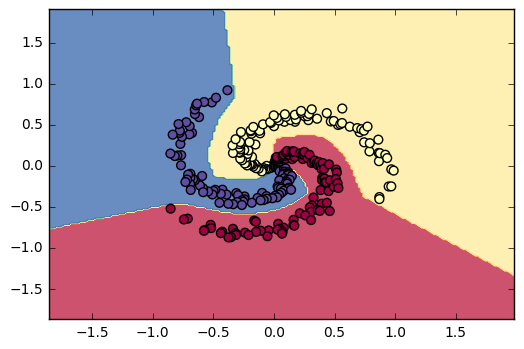

In [13]:
model=OneLayerNN(D,100,K,activation='relu',reg=1e-3)

model.train(X,y,Niter=1000,learning_rate=1e-0)


y_pred=model.predict(X)
print('training accuracy: %.2f' % (np.mean(y_pred == y)))

# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z=model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

### 1-layer NN with Sigmoid activation

iteration 0: loss 1.321289
iteration 100: loss 1.020357
iteration 200: loss 0.850365
iteration 300: loss 0.715536
iteration 400: loss 0.850146
iteration 500: loss 0.635771
iteration 600: loss 0.736300
iteration 700: loss 0.801072
iteration 800: loss 0.759357
iteration 900: loss 0.692170
iteration 1000: loss 0.774895
iteration 1100: loss 0.713294
iteration 1200: loss 0.847875
iteration 1300: loss 0.740997
iteration 1400: loss 0.788918
iteration 1500: loss 0.743211
iteration 1600: loss 0.812881
iteration 1700: loss 0.725546
iteration 1800: loss 0.702315
iteration 1900: loss 0.662056
iteration 2000: loss 0.626463
iteration 2100: loss 0.613036
iteration 2200: loss 0.656184
iteration 2300: loss 0.657604
iteration 2400: loss 0.633076
iteration 2500: loss 0.686393
iteration 2600: loss 0.638731
iteration 2700: loss 0.696141
iteration 2800: loss 0.578506
iteration 2900: loss 0.616458
iteration 3000: loss 0.643623
iteration 3100: loss 0.604736
iteration 3200: loss 0.613271
iteration 3300: loss 0

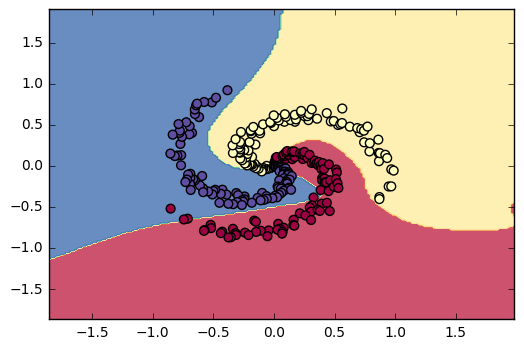

In [14]:
model=OneLayerNN(D,100,K,activation='sigmoid',reg=1e-3)

model.train(X,y,Niter=5000,learning_rate=1e-0)


y_pred=model.predict(X)
print('training accuracy: %.2f' % (np.mean(y_pred == y)))

# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z=model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

### 1-layer NN with tanh activation

iteration 0: loss 1.080556
iteration 100: loss 0.583168
iteration 200: loss 0.397016
iteration 300: loss 0.479186
iteration 400: loss 0.310500
iteration 500: loss 0.293291
iteration 600: loss 0.264544
iteration 700: loss 0.311023
iteration 800: loss 0.357958
iteration 900: loss 0.338001
iteration 1000: loss 0.312241
iteration 1100: loss 0.407291
iteration 1200: loss 0.272654
iteration 1300: loss 0.275871
iteration 1400: loss 0.286272
iteration 1500: loss 0.330690
iteration 1600: loss 0.277943
iteration 1700: loss 0.282287
iteration 1800: loss 0.232009
iteration 1900: loss 0.306447
training accuracy: 0.96


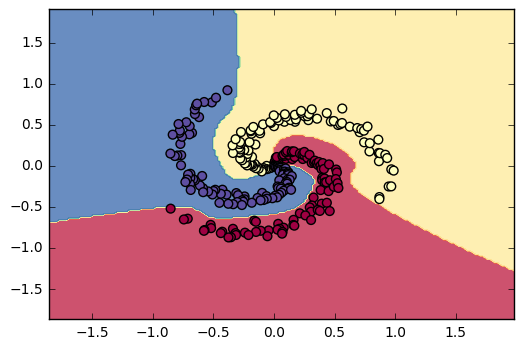

In [15]:
model=OneLayerNN(D,100,K,activation='tanh',reg=1e-3)

model.train(X,y,Niter=2000,learning_rate=1e-0)


y_pred=model.predict(X)
print('training accuracy: %.2f' % (np.mean(y_pred == y)))

# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z=model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

## 2 layer NN
Now let's make the neural network slightly more complex, from 1 hidden layer to 2 hidden layers.

**Structure**

The structure of a 2-layer Neural net is:

X(input) -> fully connect (matrix product with weight and add bias) -> activation function -> fully connect -> activation function -> softmax classifier

In [16]:
class TwoLayerNN():

  def __init__(self, input_dim=2, hidden_dim=[100,100],num_classes=10,activation='relu',reg=0.0):
    h1=input_dim
    h2 = hidden_dim[0] # size of hidden layer
    h3 = hidden_dim[1]

    N1=np.sqrt(h1)
    self.W1 = np.random.randn(h1,h2)/N1
    self.b1 = np.zeros((1,h2))

    N2=np.sqrt(h2)
    self.W2 = np.random.randn(h2,h3)/N2
    self.b2 = np.zeros((1,h3))

    N3=np.sqrt(h3)
    self.W3 = np.random.randn(h3,num_classes)/N3
    self.b3 = np.zeros((1,num_classes))

    self.reg=reg
    self.activation=activation

  def predict(self,X):
    # evaluate training set accuracy
    a1=X
    z2=np.dot(a1, self.W1) + self.b1
    if self.activation=='sigmoid':
      a2=sigmoid(z2)
    elif self.activation=='tanh':
      a2=tanh(z2)
    else: ## by default, use ReLU activation
      a2=relu(z2)
    z3=np.dot(a2,self.W2) +self.b2
    if self.activation=='sigmoid':
      a3=sigmoid(z3)
    elif self.activation=='tanh':
      a3=tanh(z3)
    else: ## by default, use ReLU activation
      a3=relu(z3)
    scores = np.dot(a3, self.W3) + self.b3
    predicted_class = np.argmax(scores, axis=1)
    # print('training accuracy: %.2f' % (np.mean(predicted_class == y)))
    return predicted_class

  def train(self,X,y,Niter=1000,learning_rate=1e-1,Nprint=100,
    batch_size=0,lr_decay=1.0):
    num_train = X.shape[0]

    if batch_size==0:
      batch_size=num_train

    for i in range(Niter):

      batch_mask = np.random.choice(num_train, batch_size)
      X_batch = X[batch_mask]
      y_batch = y[batch_mask]

      a1=X_batch

      # evaluate class scores, [N x K]
      z2=np.dot(a1, self.W1) + self.b1
      if self.activation=='sigmoid':
        a2=sigmoid(z2)
      elif self.activation=='tanh':
        a2=tanh(z2)
      else: ## by default, use ReLU activation
        a2=relu(z2)

      z3=np.dot(a2,self.W2) +self.b2

      if self.activation=='sigmoid':
        a3=sigmoid(z3)
      elif self.activation=='tanh':
        a3=tanh(z3)
      else: ## by default, use ReLU activation
        a3=relu(z3)

      z4 = np.dot(a3, self.W3) + self.b3
      
      # compute the class probabilities
      exp_scores = np.exp(z4)
      probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
      
      # compute the loss: average cross-entropy loss and regularization
      corect_logprobs = -np.log(probs[range(batch_size),y_batch])
      data_loss = np.sum(corect_logprobs)/batch_size
      reg_loss = 0.5*self.reg*np.sum(self.W1*self.W1) 
      reg_loss += 0.5*self.reg*np.sum(self.W2*self.W2) 
      reg_loss += 0.5*self.reg*np.sum(self.W3*self.W3)
      loss = data_loss + reg_loss
      if i % Nprint == 0:
        print("iteration %d: loss %f" % (i, loss))
      
      # compute the gradient on scores
      delta_d4 = probs
      delta_d4[range(batch_size),y_batch] -= 1
      delta_d4 /= batch_size
      
      # backpropate the gradient to the parameters
      # first backprop into parameters W3 and b3
      dW3 = np.dot(a3.T, delta_d4)
      db3 = np.sum(delta_d4, axis=0, keepdims=True)
      # next backprop into hidden layer
      if self.activation=='sigmoid':
        delta_d3 = np.dot(delta_d4, self.W3.T)*deriv_sig(z3)
      elif self.activation=='tanh':
        delta_d3 = np.dot(delta_d4, self.W3.T)*deriv_tanh(z3)
      else: ## by default, use ReLU activation
        delta_d3 = np.dot(delta_d4, self.W3.T)*deriv_relu(z3)

      dW2 = np.dot(a2.T, delta_d3)
      db2 = np.sum(delta_d3, axis=0, keepdims=True)

      if self.activation=='sigmoid':
        delta_d2 = np.dot(delta_d3, self.W2.T)*deriv_sig(z2)
      elif self.activation=='tanh':
        delta_d2 = np.dot(delta_d3, self.W2.T)*deriv_tanh(z2)
      else: ## by default, use ReLU activation
        delta_d2 = np.dot(delta_d3, self.W2.T)*deriv_relu(z2)

      # finally into W,b
      dW1 = np.dot(a1.T, delta_d2)
      db1 = np.sum(delta_d2, axis=0, keepdims=True)
      
      # add regularization gradient contribution
      dW3 += self.reg * self.W3
      dW2 += self.reg * self.W2
      dW1 += self.reg * self.W1
      
      # perform a parameter update
      learning_rate *= lr_decay
      self.W1 += -learning_rate * dW1
      self.b1 += -learning_rate * db1
      self.W2 += -learning_rate * dW2
      self.b2 += -learning_rate * db2
      self.W3 += -learning_rate * dW3
      self.b3 += -learning_rate * db3




### 2-layer NN with ReLu activation

iteration 0: loss 1.200732
iteration 100: loss 0.213028
training accuracy: 0.96


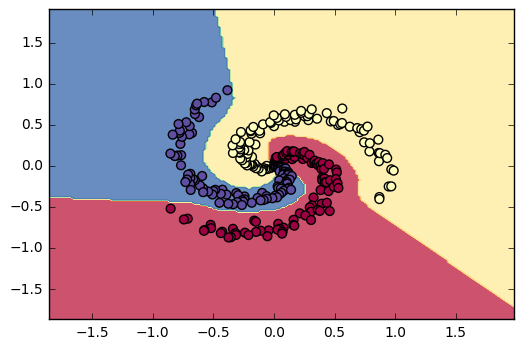

In [17]:
model=TwoLayerNN(D,[100,100],K,activation='relu',reg=1e-3)

model.train(X,y,Niter=200,learning_rate=1e-0)


y_pred=model.predict(X)
print('training accuracy: %.2f' % (np.mean(y_pred == y)))

# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z=model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

### 2-layer NN with Sigmoid activation

iteration 0: loss 1.229808
iteration 100: loss 0.986016
iteration 200: loss 0.874534
iteration 300: loss 0.770323
iteration 400: loss 0.817396
iteration 500: loss 0.725458
iteration 600: loss 0.677344
iteration 700: loss 0.693700
iteration 800: loss 0.600709
iteration 900: loss 0.600775
iteration 1000: loss 0.760870
iteration 1100: loss 0.614128
iteration 1200: loss 0.597980
iteration 1300: loss 0.539815
iteration 1400: loss 0.568947
iteration 1500: loss 0.603918
iteration 1600: loss 0.658944
iteration 1700: loss 0.635204
iteration 1800: loss 0.517407
iteration 1900: loss 0.519856
iteration 2000: loss 0.504246
iteration 2100: loss 0.595998
iteration 2200: loss 0.501170
iteration 2300: loss 0.555214
iteration 2400: loss 0.498643
iteration 2500: loss 0.542430
iteration 2600: loss 0.513990
iteration 2700: loss 0.483178
iteration 2800: loss 0.463907
iteration 2900: loss 0.458180
iteration 3000: loss 0.579965
iteration 3100: loss 0.613365
iteration 3200: loss 0.502867
iteration 3300: loss 0

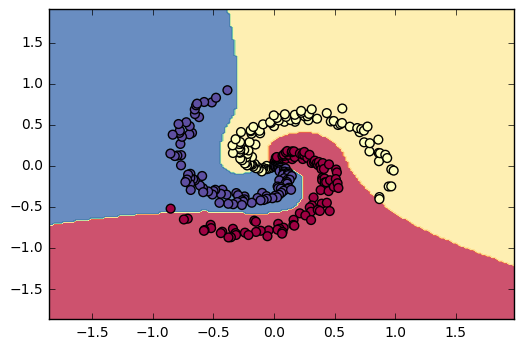

In [18]:
model=TwoLayerNN(D,[100,100],K,activation='sigmoid',reg=1e-3)

model.train(X,y,Niter=5000,learning_rate=1e-0)


y_pred=model.predict(X)
print('training accuracy: %.2f' % (np.mean(y_pred == y)))

# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z=model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

### 2-layer NN with tanh activation

iteration 0: loss 1.349512
iteration 100: loss 0.367768
iteration 200: loss 0.191394
iteration 300: loss 0.188637
iteration 400: loss 0.187435
training accuracy: 0.97


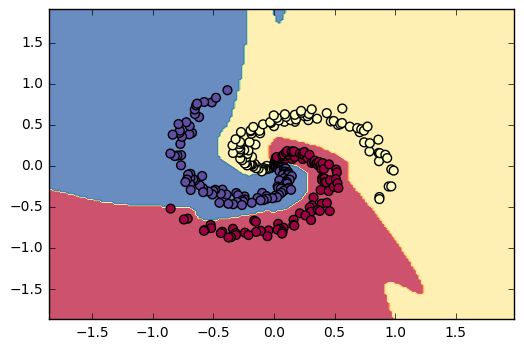

In [19]:
model=TwoLayerNN(D,[100,100],K,activation='tanh',reg=1e-3)

model.train(X,y,Niter=500,learning_rate=1e-0)


y_pred=model.predict(X)
print('training accuracy: %.2f' % (np.mean(y_pred == y)))

# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z=model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

## MNIST dataset

Now let's train the 1-layer and 2-layer neural net with MNIST dataset, and see how well our results can be.

In [20]:
from sklearn.datasets import fetch_mldata
import os
from scipy import io 
import numpy as np
import matplotlib.pyplot as plt
# import sklearn
from sklearn.model_selection import train_test_split

# from cs231_1NN_class import *
# from cs231_2NN_class import *



data_dir='mnist_data/'
file_name='mldata/mnist-original.mat'

mnist = fetch_mldata('MNIST original',data_home=data_dir)


mnist_data=np.array(mnist.data)
mnist_label=np.array(mnist.target)


X_train,X_test,y_train,y_test=train_test_split(mnist_data,mnist_label,test_size=10000,random_state=0)

y_train=y_train.astype('uint8')
y_test=y_test.astype('uint8')

print('Total size of the MNIST dataset: {}'.format(mnist.data.shape[0]))
print('Size of training set: {}'.format(X_train.shape[0]))
print('Size of testing set: {}'.format(X_test.shape[0]))

Total size of the MNIST dataset: 70000
Size of training set: 60000
Size of testing set: 10000


### Train with 1-layer Neural Net

In [23]:
D=X_train.shape[1]

K=10

model=OneLayerNN(D,1000,K,activation='relu',reg=1e-3)

model.train(X_train,y_train,Niter=2000,learning_rate=1e-4,Nprint=100,batch_size=100)

y_train_pred=model.predict(X_train).astype('uint8')
print('training accuracy: %.2f' % (np.mean(y_train_pred == y_train)))

y_test_pred=model.predict(X_test).astype('uint8')
print('test set accuracy: %.2f' % (np.mean(y_test_pred == y_test)))

iteration 0: loss 81.313445
iteration 100: loss 6.949297
iteration 200: loss 3.408379
iteration 300: loss 4.555822
iteration 400: loss 3.339851
iteration 500: loss 6.190579
iteration 600: loss 1.808355
iteration 700: loss 1.768689
iteration 800: loss 1.734954
iteration 900: loss 2.883650
iteration 1000: loss 1.389654
iteration 1100: loss 2.977620
iteration 1200: loss 1.285036
iteration 1300: loss 1.785314
iteration 1400: loss 2.069597
iteration 1500: loss 2.600304
iteration 1600: loss 2.469663
iteration 1700: loss 1.553946
iteration 1800: loss 0.879882
iteration 1900: loss 0.726107
training accuracy: 0.93
test set accuracy: 0.92


### Train with 2-layer Neural Net

In [25]:
D=X_train.shape[1]

K=10

model=TwoLayerNN(D,[1000,1000],K,activation='relu',reg=1e-3)

model.train(X_train,y_train,Niter=4000,learning_rate=1e-4,Nprint=200,batch_size=100)

y_train_pred=model.predict(X_train).astype('uint8')
print('training accuracy: %.2f' % (np.mean(y_train_pred == y_train)))

y_test_pred=model.predict(X_test).astype('uint8')
print('test set accuracy: %.2f' % (np.mean(y_test_pred == y_test)))

iteration 0: loss 75.913765
iteration 200: loss 4.091586
iteration 400: loss 2.165161
iteration 600: loss 2.250052
iteration 800: loss 1.558759
iteration 1000: loss 1.742746
iteration 1200: loss 1.792170
iteration 1400: loss 2.037172
iteration 1600: loss 1.816524
iteration 1800: loss 1.724921
iteration 2000: loss 1.245858
iteration 2200: loss 1.795648
iteration 2400: loss 2.123055
iteration 2600: loss 1.643812
iteration 2800: loss 1.181777
iteration 3000: loss 1.277736
iteration 3200: loss 1.060155
iteration 3400: loss 1.261463
iteration 3600: loss 1.087983
iteration 3800: loss 1.608370
training accuracy: 0.96
test set accuracy: 0.93
